## OCO\_Data\_Read.ipynb

Here we read in all the data in B8100r folder (all of 2017)

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset #oco2 data is netcdf, no it's actually h5...
import pandas as pd
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [2]:
# list files in data/B100r
import glob, os
files = []
files = sorted(glob.glob("/Users/katelynyu/Documents/Github/OCO2-TPW/data/B8100r/*.nc4"))

In [3]:
# Get all the data in the directory by appending NumPy arrays:

# One day's worth of data:
filename = files[0]

data = Dataset(filename, mode='r')

lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
time = data.variables['time'][:]
date = data.variables['date'][:]
xco2 = data.variables['xco2'][:]
tcwv = data.groups['Retrieval'].variables['tcwv'][:]

data.close()

# now iterate over rest of days:
for f in files[1:]:
    # append another day...
    filename = f
    data = Dataset(filename, mode='r')
    lat = np.append(lat, data.variables['latitude'][:])
    lon = np.append(lon, data.variables['longitude'][:])
    time = np.append(time, data.variables['time'][:])
    date = np.append(date, data.variables['date'][:], axis=0)
    xco2 = np.append(xco2, data.variables['xco2'][:])
    tcwv = np.append(tcwv, data.groups['Retrieval'].variables['tcwv'][:])
    data.close()

In [4]:
def get_date_info(date = date):
    year = date[0][0]
    month = date[0][1]
    day = date[0][2]
    startdate = str(date[0][0]) + '-' + str(date[0][1]) + '-' + str(date[0][2])
    enddate = str(date[-1][0]) + '-' + str(date[-1][1]) + '-' + str(date[-1][2])
    datestr = startdate + ' thru ' + enddate
    return datestr

datestr = get_date_info()

In [5]:
#test subset lat and lon
LAT = np.linspace(-90,90,21)
print('lat array           : ', LAT)

inds = np.where(np.logical_and(LAT > 20, LAT < 40))
inds2 = np.where(np.logical_and(LAT > 30, LAT < 40))
print('ind1        : ', inds)
print('ind2        : ', inds2)

print('intersection : ', np.intersect1d(inds, inds2, assume_unique=False) )
#subset lat
#lat_subset = lat[inds]
#print('subsetted lat array :',lat_subset)

lat array           :  [-90. -81. -72. -63. -54. -45. -36. -27. -18.  -9.   0.   9.  18.  27.  36.
  45.  54.  63.  72.  81.  90.]
ind1        :  (array([13, 14]),)
ind2        :  (array([14]),)
intersection :  [14]


In [6]:
#subset to just a box surrounding california

left_lon = -126
right_lon = -112
top_lat = 43
bottom_lat = 30

inds = np.where(np.logical_and(lat > bottom_lat, lat < top_lat))
inds2 = np.where(np.logical_and( lon > left_lon, lon < right_lon))

inds_final = np.intersect1d(inds, inds2, assume_unique=False)
# inds_final are the indices of the locations we want.


## Scatter the OCO2 TCWV soundings just for the california region

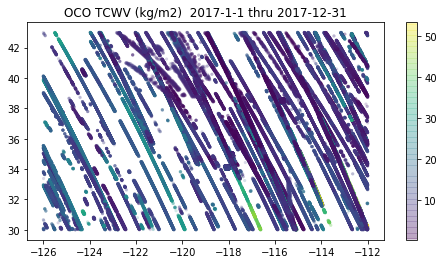

In [7]:
plt.scatter(lon[inds_final], lat[inds_final], 10, tcwv[inds_final], edgecolors='none', alpha=0.2)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.colorbar()
plt.title("OCO TCWV (kg/m2)  " + datestr)
fig = plt.gcf()
fig.set_size_inches(8, 4)

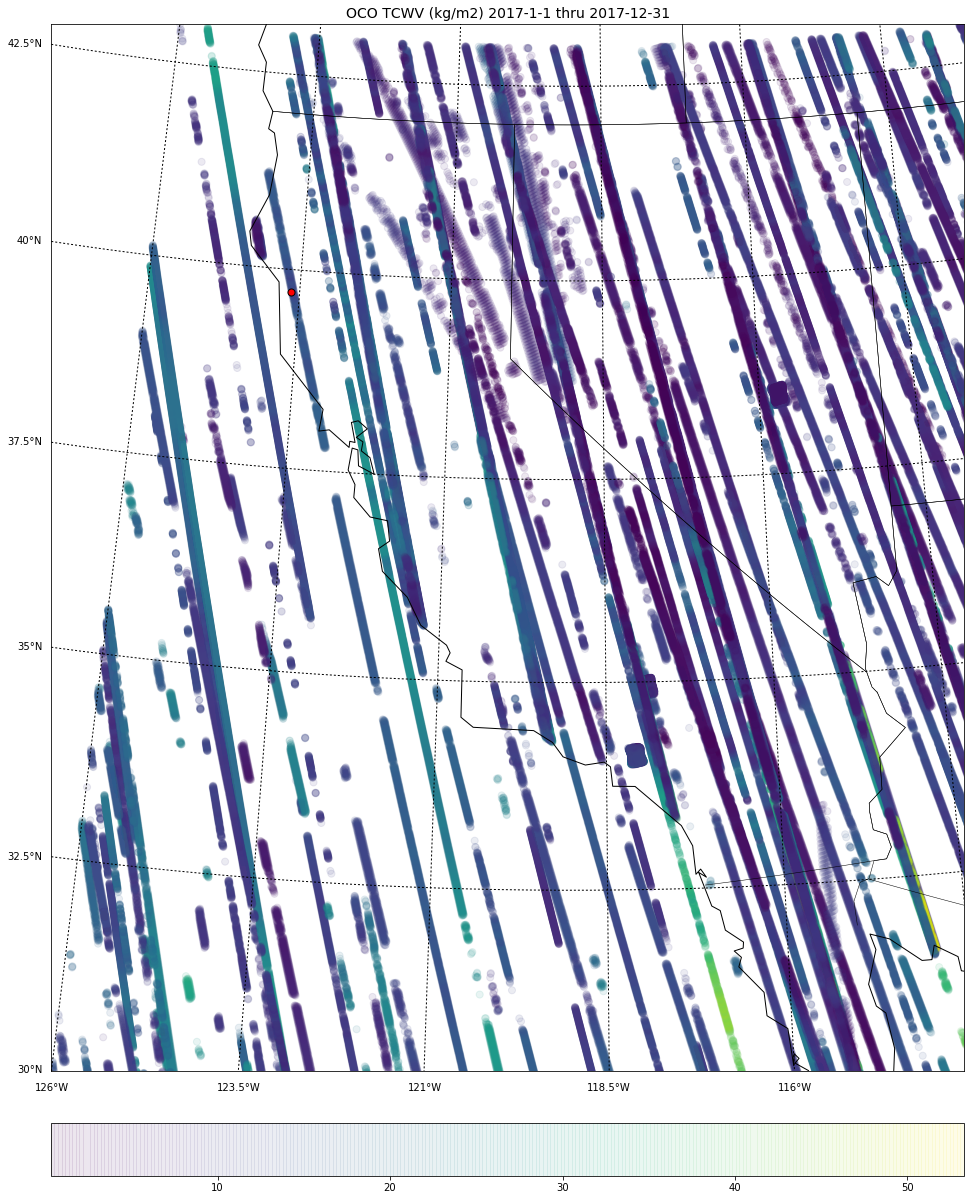

In [9]:
# plot on a map:

left_lon = -126
right_lon = -112
middle_lon = (left_lon + right_lon)/2.0
top_lat = 43
bottom_lat = 30
middle_lat = (top_lat + bottom_lat)/2.0

latcorners = lat[inds_final]
loncorners = lon[inds_final]
lon_0 = middle_lon
lat_0 = middle_lat
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=bottom_lat,urcrnrlat=top_lat,\
            llcrnrlon=left_lon,urcrnrlon=right_lon,\
            rsphere=6371200.,resolution='l',area_thresh=10000)

m.drawcoastlines()
m.drawstates()
# draw parallels.
m.drawcountries()
parallels = np.arange(bottom_lat,top_lat,2.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(left_lon,right_lon,2.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

x, y = m(lon[inds_final],lat[inds_final])
sct = m.scatter(x,y,50, tcwv[inds_final], marker='o', edgecolors=None, alpha=0.1)
plt.title('OCO TCWV (kg/m2) ' + datestr,fontsize=14)
cbar = m.colorbar(sct,location='bottom',pad="5%")
fig = plt.gcf()
fig.set_size_inches(30, 20)

#add dot for angelo:
CZO_lat = 39.72
CZO_lon = -123.65
X,Y = m(CZO_lon,CZO_lat)
m.scatter(X,Y,50, marker='o', color='red', edgecolors='k')
